In [ ]:
import pandas as pd

## 5. Объединения наборов данных с помощью pandas

**Объединение данных (join/merge) в pandas работает аналогично SQL. Основные типы объединения:**

	1.	INNER JOIN – Пересечение (только совпадающие строки)
	2.	LEFT JOIN – Все строки из левого DataFrame + совпадающие из правого
	3.	RIGHT JOIN – Все строки из правого DataFrame + совпадающие из левого
	4.	OUTER JOIN – Все строки из обоих DataFrame, заполняя NaN, если данных нет

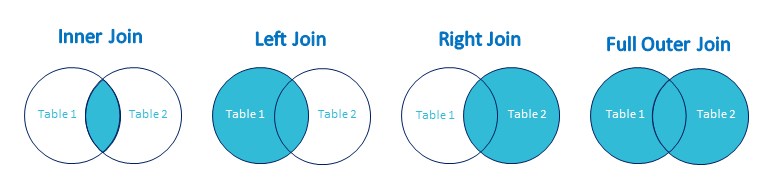

## Склеивание фреймов вдоль оси (конкатенация )

**`.concat()` используется для объединения (конкатенации) DataFrame и Series по строкам или столбцам. В отличие от `.merge()`, он не требует общего ключа.**


In [ ]:
df1 = pd.DataFrame({"A": ["A0", "A1", "A2", "A3"],
                    "B": ["B0", "B1", "B2", "B3"],
                    "C": ["C0", "C1", "C2", "C3"],
                    "D": ["D0", "D1", "D2", "D3"],}, index=[0, 1, 2, 3]
)


df2 = pd.DataFrame({"A": ["A4", "A5", "A6", "A7"],
                    "B": ["B4", "B5", "B6", "B7"],
                    "C": ["C4", "C5", "C6", "C7"],
                    "D": ["D4", "D5", "D6", "D7"],},index=[0, 1, 2, 3])


df3 = pd.DataFrame({"A": ["A8", "A9", "A10", "A11"],
                    "B": ["B8", "B9", "B10", "B11"],
                    "C": ["C8", "C9", "C10", "C11"],
                    "D": ["D8", "D9", "D10", "D11"],},index=[7, 8, 9, 10])


df_new = pd.concat([df1, df2, df3]).reset_index(drop=True)# сбрасываем индексы # drop=True - полный сброс индексов

In [ ]:
df_new

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [ ]:
df1 = pd.DataFrame({"A": ["A0", "A1", "A2", "A3"],
                    "B": ["B0", "B1", "B2", "B3"],
                    "C": ["C0", "C1", "C2", "C3"],
                    "D": ["D0", "D1", "D2", "D3"],}, index=[0, 1, 2, 3])

df4 = pd.DataFrame(
     {"B": ["B2", "B3", "B6", "B7"],
      "D": ["D2", "D3", "D6", "D7"],
      "F": ["F2", "F3", "F6", "F7"],},
     index=[0, 1, 2, 4])


pd.concat([df1, df4], axis=1, join = 'inner')

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,B2,D2,F2
1,A1,B1,C1,D1,B3,D3,F3
2,A2,B2,C2,D2,B6,D6,F6


In [ ]:
pd.concat([df1, df4], axis=0, join ='outer')


,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
0,NaN,B2,NaN,D2,F2
1,NaN,B3,NaN,D3,F3
2,NaN,B6,NaN,D6,F6
4,NaN,B7,NaN,D7,F7


# Объединение фреймов по ключам


**В pandas метод `.merge() `используется для объединения двух DataFrame по ключевым столбцам, индексам или условиям. Он аналогичен SQL JOIN.**

In [ ]:

df_0 = pd.DataFrame({"key1": ["K0", "K1", "K2", "K4"],
                     "key2": ["K0", "K1", "K2", "K3"],
                     "A": ["A0", "A1", "A2", "A3"],
                     "B": ["B0", "B1", "B2", "B3"],})


df_1 = pd.DataFrame({"key1": ["K0", "K1", "K2", "K3"],
                      "key2": ["K0", "K1", "K2", "K3"],
                      "C": ["C0", "C1", "C2", "C3"],
                      "D": ["D0", "D1", "D2", "D3"],})



In [ ]:
df_0

,key1,key2,A,B
0,K0,K0,A0,B0
1,K1,K1,A1,B1
2,K2,K2,A2,B2
3,K4,K3,A3,B3


In [ ]:
df_1

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K1,C1,D1
2,K2,K2,C2,D2
3,K3,K3,C3,D3


In [ ]:
pd.merge(df_0, df_1, how="left", on=["key1","key2"]) # левый все, правый пересечение

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K1,A1,B1,C1,D1
2,K2,K2,A2,B2,C2,D2
3,K4,K3,A3,B3,NaN,NaN


In [ ]:
pd.merge(df_0, df_1, on=["key1"], how='outer', suffixes=('_0','_1'))

,key1,key2_0,A,B,key2_1,C,D
0,K0,K0,A0,B0,K0,C0,D0
1,K1,K1,A1,B1,K1,C1,D1
2,K2,K2,A2,B2,K2,C2,D2
3,K3,NaN,NaN,NaN,K3,C3,D3
4,K4,K3,A3,B3,NaN,NaN,NaN


In [ ]:
df_0 = pd.DataFrame({"key1": ["K0", "K1", "K2", "K4"],
                     "key2": ["K0", "K1", "K2", "K3"],
                     "A": ["A0", "A1", "A2", "A3"],
                     "B": ["B0", "B1", "B2", "B3"],})


df_1 = pd.DataFrame({"key1": ["K0", "K1", "K2", "K3"],
                      "key2": ["K0", "K1", "K2", "K3"],
                      "C": ["C0", "C1", "C2", "C3"],
                      "D": ["D0", "D1", "D2", "D3"],})


In [ ]:
pd.merge(df_0, df_1, how="right", on=["key1", "key2"])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K1,A1,B1,C1,D1
2,K2,K2,A2,B2,C2,D2
3,K3,K3,NaN,NaN,C3,D3


In [ ]:
pd.merge(df_0, df_1, how="outer", on=["key1", "key2"])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K1,A1,B1,C1,D1
2,K2,K2,A2,B2,C2,D2
3,K3,K3,NaN,NaN,C3,D3
4,K4,K3,A3,B3,NaN,NaN


In [ ]:
df_0

,key1,key2,A,B
0,K0,K0,A0,B0
1,K1,K1,A1,B1
2,K2,K2,A2,B2
3,K4,K3,A3,B3


In [ ]:
df_1

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K1,C1,D1
2,K2,K2,C2,D2
3,K3,K3,C3,D3


In [ ]:
pd.merge(df_0, df_1, how="inner", on=["key1", "key2"])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K1,A1,B1,C1,D1
2,K2,K2,A2,B2,C2,D2


In [ ]:
pd.merge(df_0, df_1, how="outer")

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K1,A1,B1,C1,D1
2,K2,K2,A2,B2,C2,D2
3,K3,K3,NaN,NaN,C3,D3
4,K4,K3,A3,B3,NaN,NaN


## Объединение фреймов по индексам

**Метод `.join()` используется для объединения DataFrame по индексам, а не по значениям в столбцах, как `merge()`. Он полезен, когда у вас есть данные с разными столбцами, но совпадающими индексами.**

In [ ]:


a = pd.DataFrame({"A": ["A0", "A1", "A2"],
                  "B": ["B0", "B1", "B2"]}, index=["K0", "K1", "K2"])


b = pd.DataFrame({"C": ["C0", "C2", "C3"],
                  "D": ["D0", "D2", "D3"]}, index=["K0", "K2", "K3"])

In [ ]:
a.join(b, how="left")

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [ ]:
a.join(b, how="outer")

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


In [ ]:
a.join(b, how="inner")

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2


## Реальный пример объединения датасетов

🖊 **Задача**:

* 1) представить информацию о загрязнении воздуха в Санкт-Петерубурге за 2020 год по административным районам.

* 2) объединить отчет за 2019 год с отчетом за 2020 год.

In [ ]:
air2019 = pd.read_csv('air_polution_2019.csv')
air2020 = pd.read_csv('air_polution_2020.csv')
spb = pd.read_csv('spb_municipal_districts.csv')

In [ ]:
air2019.head()

,region,mun_obr,year,S02,CO,NO2
0,Санкт-Петербург,Адмиралтейский район,2019,997.940,4271.066,2682.874
1,Санкт-Петербург,Василеостровский район,2019,14.375,1653.871,2745.726
2,Санкт-Петербург,Выборгский район,2019,18.141,775.078,208.721
3,Санкт-Петербург,Калининский район,2019,3.527,210.341,667.040
4,Санкт-Петербург,Кировский район,2019,152.655,9294.031,6920.741


In [ ]:
air2020.head()

,region,mun_obr,year,S02,CO,NO2
0,Санкт-Петербург,город Зеленогорск,2020,3.062000,22.409000,6.468000
1,Санкт-Петербург,город Колпино,2020,121.582572,1459.870066,1146.561707
2,Санкт-Петербург,город Красное Село,2020,1.648726,41.421563,14.436886
3,Санкт-Петербург,город Кронштадт,2020,24.200000,84.002930,16.897000
4,Санкт-Петербург,город Ломоносов,2020,20.946000,352.786000,131.175000


In [ ]:
spb.head()

,Район,Муниципальный округ
0,Адмиралтейский,муниципальный округ Коломна
1,Адмиралтейский,муниципальный округ Сенной округ
2,Адмиралтейский,муниципальный округ Адмиралтейский округ
3,Адмиралтейский,муниципальный округ Семёновский
4,Адмиралтейский,муниципальный округ Измайловское


Просмотр уникальных значений

In [ ]:
air2020['mun_obr'].value_counts().to_dict()

{'город Зеленогорск': 1,
 'муниципальный округ Прометей': 1,
 'муниципальный округ Сосновая поляна': 1,
 'муниципальный округ Смольнинское': 1,
 'муниципальный округ Сергиевское': 1,
 'муниципальный округ Сенной округ': 1,
 'муниципальный округ Семеновский': 1,
 'муниципальный округ Северный': 1,
 'муниципальный округ Светлановское': 1,
 'муниципальный округ Сампсониевское': 1,
 'муниципальный округ Рыбацкое': 1,
 'муниципальный округ Ржевка': 1,
 'муниципальный округ Пулковский меридиан': 1,
 'муниципальный округ Правобережный': 1,
 'муниципальный округ Народный': 1,
 'муниципальный округ Посадский': 1,
 'муниципальный округ Пороховые': 1,
 'муниципальный округ Полюстрово': 1,
 'муниципальный округ Пискаревка': 1,
 'муниципальный округ Остров Декабристов': 1,
 'муниципальный округ округ Петровский': 1,
 'муниципальный округ Оккервиль': 1,
 'муниципальный округ Озеро Долгое': 1,
 'муниципальный округ Обуховский': 1,
 'муниципальный округ Новоизмайловское': 1,
 'муниципальный округ Невс

In [ ]:
spb['Муниципальный округ'].value_counts().to_dict()

{'муниципальный округ Коломна': 1,
 'муниципальный округ Обуховский': 1,
 'муниципальный округ округ Петровский': 1,
 'муниципальный округ Аптекарский остров': 1,
 'муниципальный округ Посадский': 1,
 'муниципальный округ Кронверкское': 1,
 'муниципальный округ Введенский': 1,
 'муниципальный округ Правобережный': 1,
 'муниципальный округ Оккервиль': 1,
 'муниципальный округ Невский округ': 1,
 'муниципальный округ № 54': 1,
 'муниципальный округ Народный': 1,
 'муниципальный округ Рыбацкое': 1,
 'муниципальный округ Ивановский': 1,
 'город Ломоносов': 1,
 'муниципальный округ Невская застава': 1,
 'муниципальный округ Звёздное': 1,
 'муниципальный округ Пулковский меридиан': 1,
 'муниципальный округ Новоизмайловское': 1,
 'муниципальный округ Гагаринское': 1,
 'муниципальный округ Московская застава': 1,
 'посёлок Ушково': 1,
 'посёлок Солнечное': 1,
 'посёлок Смолячково': 1,
 'посёлок Серово': 1,
 'посёлок Репино': 1,
 'муниципальный округ Чкаловское': 1,
 'город Петергоф': 1,
 'посё

Меняем названия колонок

In [ ]:
spb.columns = ['district', 'mun_obr']

Чистка значений

In [ ]:
spb['mun_obr'] = spb['mun_obr'].str.replace('№', 'N')
spb['mun_obr'] = spb['mun_obr'].str.replace('ё', 'е')
spb['mun_obr'] = spb['mun_obr'].str.replace('Поляна', 'поляна')

Слияние по колонке `mun_obr` (левый join). Чистка после merge.

In [ ]:
df = pd.merge(spb, air2020, how="left", on=['mun_obr'])
df['year'] = df['year'].fillna(2020).astype('int64')
df['region'] = df['region'].fillna('Caнкт-Петербург').astype('str')
df = df.fillna(0)
df

,district,mun_obr,region,year,S02,CO,NO2
0,Адмиралтейский,муниципальный округ Коломна,Санкт-Петербург,2020,4.418191,172.815630,142.548479
1,Адмиралтейский,муниципальный округ Сенной округ,Санкт-Петербург,2020,0.002000,27.458000,11.773000
2,Адмиралтейский,муниципальный округ Адмиралтейский округ,Санкт-Петербург,2020,927.965000,5405.924000,3561.182000
3,Адмиралтейский,муниципальный округ Семеновский,Санкт-Петербург,2020,0.042000,9.003000,3.343000
4,Адмиралтейский,муниципальный округ Измайловское,Санкт-Петербург,2020,2.767005,45.299043,27.829026
...,...,...,...,...,...,...,...
106,Центральный,муниципальный округ N 78,Санкт-Петербург,2020,0.000000,1.568294,0.105017
107,Центральный,муниципальный округ Литейный округ,Санкт-Петербург,2020,0.252000,234.576000,90.011000
108,Центральный,муниципальный округ Смольнинское,Санкт-Петербург,2020,3.353200,874.365000,415.871500
109,Центральный,муниципальный округ Лиговка-Ямская,Санкт-Петербург,2020,11.406444,226.263011,184.384368


Проверка на отсутствующие значения

In [ ]:
missing_rows = df[df.isna().any(axis=1)]
missing_rows

,district,mun_obr,region,year,S02,CO,NO2


Группировка по районам (агрегируем сумму)

In [ ]:
air2020_grouped_by = df.groupby(["district"])[["S02", "CO", "NO2"]].sum().reset_index()
#air2020_grouped_by

Добавляем недостающие колонки, делаем чистку, переименовываем колонки

In [ ]:
air2020_grouped_by['region'] = "Санкт-Петербург"
air2020_grouped_by['year'] = 2020
air2020_grouped_by['district'] = air2020_grouped_by['district'] + " район"
air2020_grouped_by = air2020_grouped_by.rename(columns={"district": "mun_obr"})
air2020_grouped_by.head()

,mun_obr,S02,CO,NO2,region,year
0,Адмиралтейский район,935.624046,5697.388280,3787.369083,Санкт-Петербург,2020
1,Василеостровский район,8.908246,923.821316,1394.595697,Санкт-Петербург,2020
2,Выборгский район,28.720800,772.961694,338.627767,Санкт-Петербург,2020
3,Калининский район,5.731568,865.851330,721.189800,Санкт-Петербург,2020
4,Кировский район,249.200966,4759.207947,3305.420791,Санкт-Петербург,2020


In [ ]:
air2019.head()

,region,mun_obr,year,S02,CO,NO2
0,Санкт-Петербург,Адмиралтейский район,2019,997.940,4271.066,2682.874
1,Санкт-Петербург,Василеостровский район,2019,14.375,1653.871,2745.726
2,Санкт-Петербург,Выборгский район,2019,18.141,775.078,208.721
3,Санкт-Петербург,Калининский район,2019,3.527,210.341,667.040
4,Санкт-Петербург,Кировский район,2019,152.655,9294.031,6920.741


Делаем конкат по оси 0. Получаем готовый отчет



In [ ]:
report = pd.concat([air2019, air2020_grouped_by]).reset_index(drop=True)
report

,region,mun_obr,year,S02,CO,NO2
0,Санкт-Петербург,Адмиралтейский район,2019,997.940000,4271.066000,2682.874000
1,Санкт-Петербург,Василеостровский район,2019,14.375000,1653.871000,2745.726000
2,Санкт-Петербург,Выборгский район,2019,18.141000,775.078000,208.721000
3,Санкт-Петербург,Калининский район,2019,3.527000,210.341000,667.040000
4,Санкт-Петербург,Кировский район,2019,152.655000,9294.031000,6920.741000
5,Санкт-Петербург,Колпинский район,2019,203.288000,3793.716000,4401.561000
6,Санкт-Петербург,Красногвардейский район,2019,15.779000,338.911000,151.216000
7,Санкт-Петербург,Красносельский район,2019,18.477000,245.719000,85.802000
8,Санкт-Петербург,Кронштадтский район,2019,43.453000,73.284000,55.436000
9,Санкт-Петербург,Курортный район,2019,7.691000,419.104000,155.936000


In [ ]:
report.to_csv('report_air_polution_2019_2020', index="False")

In [ ]:
import os

os.listdir()

['.config',
 'Students_info_3.csv',
 'Students_info_9.csv',
 'Students_info_2.csv',
 'Students_info_7.csv',
 'data.csv',
 'Students_marks_4.csv',
 'Students_marks_8.csv',
 'Students_info_1.csv',
 'air_polution_2020.csv',
 'air_polution_2019.csv',
 'Students_marks_0.csv',
 'spb_municipal_districts.csv',
 'Students_marks_5.csv',
 'Students_info_0.csv',
 'Students_info_6.csv',
 'Students_marks_2.csv',
 'Students_info_5.csv',
 'Students_info_4.csv',
 'Students_marks_1.csv',
 'Students_marks_6.csv',
 'Students_marks_9.csv',
 'Students_marks_7.csv',
 'Students_marks_3.csv',
 'report_air_polution_2019_2020',
 'Students_info_8.csv',
 'sample_data']